PANDAS & SEABORD - HANDS ON ACTIVITY 4


In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
anime_data = pd.read_csv("../_assets/csv_file/anime.csv")

anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


WHAT ANIME GENRE IS MORE COMMON FOR ANIME PRODUCTION?

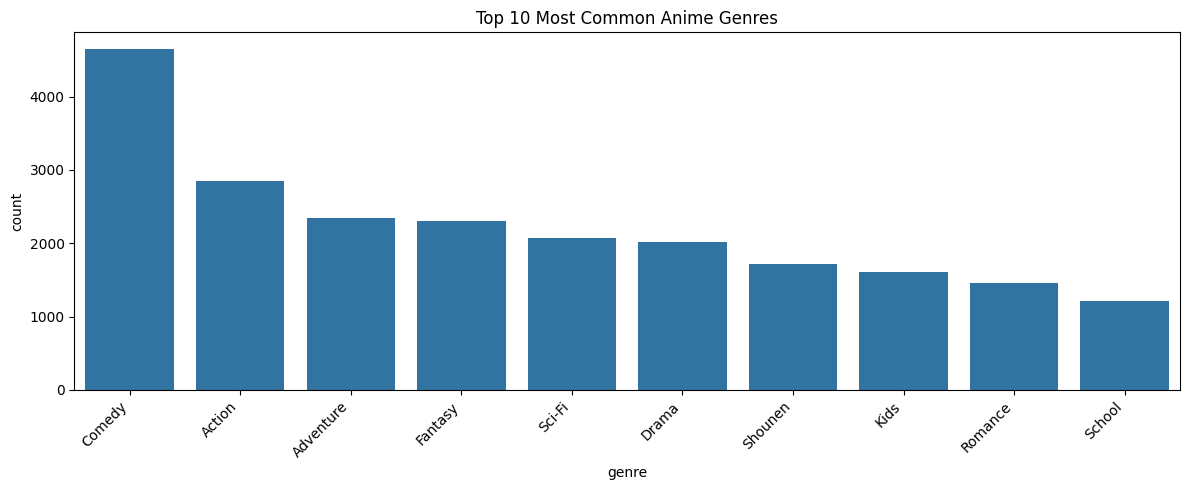

In [3]:
try:
    anime_data
except NameError:
    anime_data = pd.read_csv("../_assets/csv_file/anime.csv")

genres_series = anime_data['genre'].dropna().str.split(',').explode().str.strip()

top_genres = genres_series.value_counts().head(10).reset_index()
top_genres.columns = ['genre', 'count']

plt.figure(figsize=(12,5))
sns.barplot(data=top_genres, x='genre', y='count')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Common Anime Genres")
plt.tight_layout()
plt.show()

INSIGHTS:

Comedy is the most dominant genre, significantly exceeding the frequency of other categories. While being followed by Action and Adventure, it shows that anime production leans heavily on fast-paced and mostly entertaining themes for the viewers. While Romance and School genre appears less common, indicates a small amout or more specialized viewers, but still has an impact in the anime world.


HOW IS ANIME TYPE DISTRIBUTED IN THE ANIME WORLD?

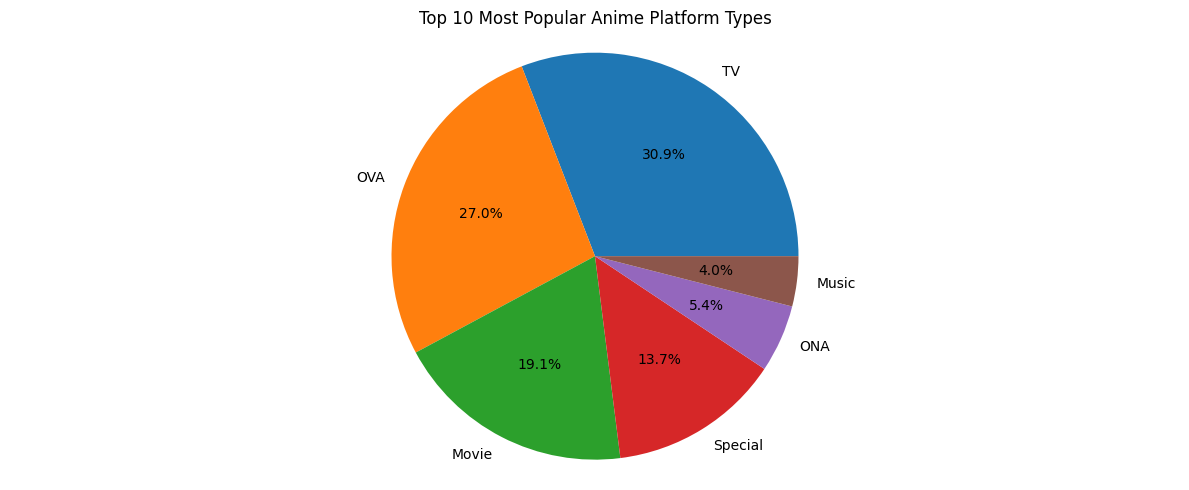

In [4]:
try:
    anime_data
except NameError:
    anime_data = pd.read_csv("../_assets/csv_file/anime.csv")

plt.figure(figsize=(12,5))
plt.pie(anime_data['type'].value_counts().head(10), labels=anime_data['type'].value_counts().head(10).index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Top 10 Most Popular Anime Platform Types")
plt.tight_layout()
plt.show()


INSIGHTS:

TV platform stands as the most common types in the data set, indicating that most anime studios frequently rely on a serialized telivision to develop a longer narratives and to maintain viewers engagement. Conversely, anime formats such as OVA and Movie is still a popular choice, suggesting that anime producers uses these types for a special releases, higher quality production, or a single and standalone storytelling for the viewers to unfold. This balances the anime studios production, while using the serialized telivision content while still supporting alternative formats for the viewers expectations. 

Is there a relationship between number of episodes and rating?

C:\Users\M S I\AppData\Local\Temp\ipykernel_7424\730253218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_data["episodes"] = anime_data["episodes"].astype(int)


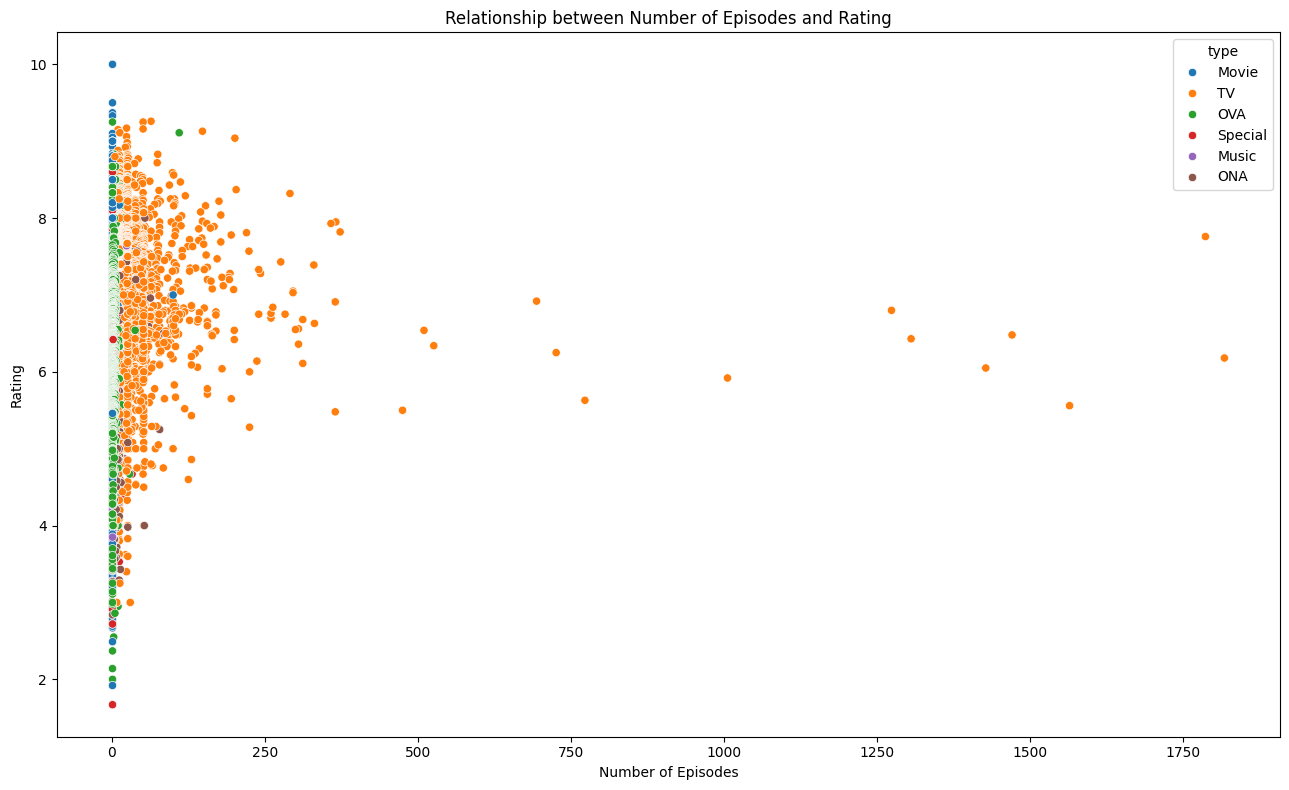

In [ ]:
try:
    anime_data
except NameError:
    anime_data = pd.read_csv("../_assets/csv_file/anime.csv")

anime_data = anime_data[pd.to_numeric(anime_data["episodes"], errors="coerce").notnull()]
anime_data["episodes"] = anime_data["episodes"].astype(int)
anime_data = anime_data[anime_data["episodes"] > 0]
anime_data.loc[anime_data["episodes"] == 0, "episodes"] = 1

plt.Figure(figsize=(12,5))
sns.scatterplot(data=anime_data, x='episodes', y='rating', hue='type')
plt.title("Relationship between Number of Episodes and Rating")
plt.xlabel("Number of Episodes")
plt.ylabel("Rating")
plt.gcf().set_size_inches(13,8)
plt.tight_layout()
plt.show()